# Modelos con variables latentes y repaso del algoritmo K-Means

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/e/e5/KMeans-Gaussian-data.svg" width="500px" height="300px" />

> **¿Qué significa variable latente?**

> Para responder a esta pregunta, nos remontamos hacia la raiz *latina* etimológica de la palabra latente. Esta palabra viene la palabra en Latín **latens** que significa escondido u oculto.

> En el contexto del modelado probabilístico nos referimos con variables latentes a variables que nunca observamos, pero que (inferimos) están ahí.

## 1. Variables latentes

### ¿Porqué consideramos variables latentes?

Hay diversas razones por las que permitirnos incluir variables latentes en nuestros modelos cobra muchísima importancia. Algunas de ellas:

1. **No porque no observemos una variable significa que no exista.**

2. **Muchas veces nos permiten conseguir modelos más simples.**

**Ejemplo:**

Una empresa acaba de abrir una posición en el equipo de ciencia de datos. En este sentido, el departamento de RH está interesado en entrevistar a varios candidatos para encontrar a alguien idóneo para la posición.

Para ello, ya se tiene un tabulador que involucra varias variables:
- Grado académico.
- Promedio de calificaciones del último grado académico.
- Entrevista telefónica.
- Entrevista en vivo.

Sin embargo, la entrevista en vivo es un evento que puede llegar a involucrar muchos recursos económicos, y por experiencia, hay varios candidatos que se pueden descartar con solo el conocimiento de las otras variables. La idea es desarrollar un modelo usando datos históricos del departamento de RH:

| Candidato | Grado | Promedio | E. Telefónica | E. Vivo |
| --------- | ----- | -------- | ------------- | ------- |
| 1         | Lic   | 8.4      | 7             | 5       |
| 2         | Maes  | 8.0      | 7             | 6       |
| 3         | Lic   | 9.5      | 8             | 9       |
| 4         | Doc   | 8.9      | 9             | 10      |

Si intentamos establecer un modelo que relacione estas variables, después de revisarlo un poco, llegaríamos a que todas estas variables están relacionadas entre sí, obteniendo un modelo completamente conectado,

![fully_conn](figures/fully_connected.png)

con lo que no tendríamos ni una sola pista de la estructura del modelo, y tendríamos que definir la probabilidad conjunta sobre todas las variables (número exponencial de parámetros).

*Alternativa 1*: considerar un modelo estructurado del tipo

$$
p(x_1, x_2, x_3, x_4) = \frac{\exp\{-w^T x\}}{Z},
$$

con lo que solo tendríamos 5 parámetros $w_0, w_1, w_2, w_3, w_4$. Sin embargo, $Z$ es una constante de normalización que involucra una suma sobre todos los posibles valores de las cuatro variables aleatorias.

*Alternativa 2*: considerar una variable latente de Inteligencia

![latent](figures/latent.png)

con lo que el modelo sería:

$$
p(x_1, x_2, x_3, x_4) = \sum_{I} p(x_1, x_2, x_3, x_4 | I) p(I) = \sum_{I} p(x_1 | I)p(x_2 | I)p(x_3 | I)p(x_4 | I) p(I)
$$

Con esto reducimos notablemente la complejidad del modelo.

3. **Aplicaciones prácticas -> Clustering -> Segmentación de clientes, Motores de búsqueda, Sistemas de recomendación, ...**

En aplicaciones clustering pretendemos descubrir segmentaciones en los datos. Esta segmentación la podemos entender como una variable latente.

## 2. Clustering

Probablemente ya hayan escuchado hablar de clustering. Como tal, es de las aplicaciones más importantes en aprendizaje **no supervisado**, y seguramente en un proyecto de análisis de datos no va a pasar más de un mes para cuando necesiten utilizar este tipo de técnicas. Así que vamos a estudiar un par de ellas.

**Ejemplo:**

Los departamentos de créditos en general (personas, pymes, empresarial) normalmente estudian la relación entre ingresos y deuda del candidato a crédito para decidir si acreditan o no a la persona. 

Hay varias heurísticas que se utilizan. Por ejemplo:

- Si las deudas rebasan el 40% del apalancamiento (capital social + ingresos + pasivos), es una empresa de alto riesgo.
- Si las deudas rebasan 3 meses de ingresos, es una empresa de alto riesgo.

Se puede estudiar esta relación, y segmentar a los clientes de acuerdo a su perfil en estas variables.

In [1]:
# Importamos función para generar datos
from bank_customer_data import generate_bank_customer_data
# Importamos pyplot
from matplotlib import pyplot as plt

In [2]:
# Generamos datos
data = generate_bank_customer_data()

In [6]:
data.head(10)

,income,debt,labels
0,1.332974,4.992805,1.0
1,0.006080,3.799847,0.0
2,1.591057,5.733520,1.0
3,3.455210,3.469757,0.0
4,1.338672,6.081983,1.0
5,3.417696,3.096798,0.0
6,3.532126,1.773208,0.0
7,2.471411,6.875353,1.0
8,4.825952,2.542863,0.0
9,3.462531,1.187322,0.0


Text(0, 0.5, 'Deuda (x100k MXN)')

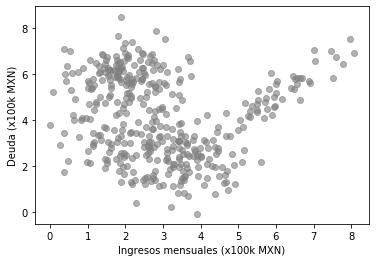

In [7]:
# Datos
plt.scatter(data["income"], data["debt"], c="gray", alpha=0.6)
plt.xlabel("Ingresos mensuales (x100k MXN)")
plt.ylabel("Deuda (x100k MXN)")

Lo que queremos en clustering es identificar los grupos a los que pertenecen cada uno de los clientes.

Text(0, 0.5, 'Deuda (x100k MXN)')

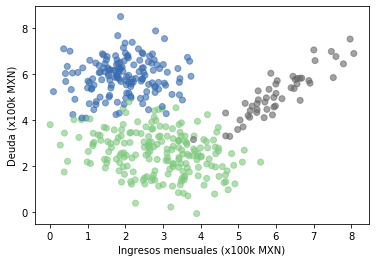

In [8]:
# Grupos "reales"
plt.scatter(data["income"], data["debt"], c=data["labels"], cmap="Accent", alpha=0.6)
plt.xlabel("Ingresos mensuales (x100k MXN)")
plt.ylabel("Deuda (x100k MXN)")

Esta idea se conoce como **Hard clustering**; bajo este esquema, identificamos para cada punto un único grupo al que pertenece, es decir:

$$
\text{cluster_id}_x = f(x)
$$

- Los puntos verdes son 100% verdes.
- Los puntos azules son 100% azules.
- Los puntos grises son 100% grises.

Sin embargo, fijemos un momento nuestra atención en los recuadros a continuación ($[2, 3] \times [4, 5]$ y $[4, 5] \times [3, 4]$):

Text(0, 0.5, 'Deuda (x100k MXN)')

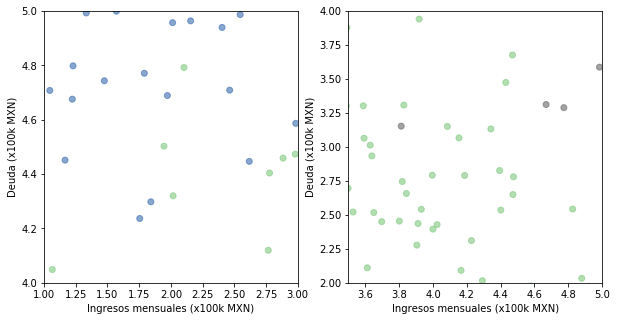

In [11]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data["income"], data["debt"], c=data["labels"], cmap="Accent", alpha=0.6)
plt.axis([1, 3, 4, 5])
plt.xlabel("Ingresos mensuales (x100k MXN)")
plt.ylabel("Deuda (x100k MXN)")

plt.subplot(1, 2, 2)
plt.scatter(data["income"], data["debt"], c=data["labels"], cmap="Accent", alpha=0.6)
plt.axis([3.5, 5, 2, 4])
plt.xlabel("Ingresos mensuales (x100k MXN)")
plt.ylabel("Deuda (x100k MXN)")

Desde un punto de vista intuitivo, los puntos en estos sectores no es muy claro a qué grupo pertenecen. Estaríamos tentados a decir que pertenecen a un grupo con cierta probabilidad y con cierta probabilidad a otro.

Esta idea se conoce como **Soft clustering**, y está estrechamente relacionado a **clustering probabilístico**.

$$
p(\text{cluster_id}_x |x)
$$

Al darle un enfoque probabilístico, tenemos varias ventajas colaterales:

- Sintonización de hiperparámetros.
- Modelo generativo.

## 3. Un algoritmo de hard clustering: K-Means

Aunque el K-Means es uno de los algoritmos de hard clustering más conocidos y usados, lo veremos en un par de sesiones más desde una perspectiva probabilística. 

De manera que nos conviene estudiarlo antes.

**Problema:** dado un conjunto de observaciones $x_1, x_2, \dots, x_N \in \mathbb{R}^d$, se debe particionar las $N$ observaciones en $k$ ($\leq N$) clusters $\{1, 2, \dots, k\}$, de manera que se minimice la suma de distancias al cuadrado (varianza).

**Algoritmo:**

1. Inicializar los parámetros $\theta = \{\mu_1, \dots, \mu_k\}$ de manera aleatoria.
2. Repetir hasta la convergencia (hasta que los parámetros no varíen):
   1. Para cada punto calcule el centroide más cercano:
      $$
      c_i = \arg \min_{c} ||x_i - \mu_c||.
      $$
      
   2. Actualizar centroides:
      $$
      \mu_c = \frac{\sum_{i: c_i = c} x_i}{\sum_{i: c_i = c} 1}
      $$

**Tarea:** Programar el algoritmo K-Means.

Nosotros usaremos sklearn durante la clase:

In [12]:
# Importamos sklearn.cluster.KMeans
from sklearn.cluster import KMeans

In [14]:
# Algoritmo de sklearn
KMeans?

In [15]:
# Instanciamos el algoritmo
kmeans = KMeans(n_clusters=3)

In [16]:
# Entrenamos
kmeans.fit(X=data[["income", "debt"]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0, 0.5, 'Deuda (x100k MXN)')

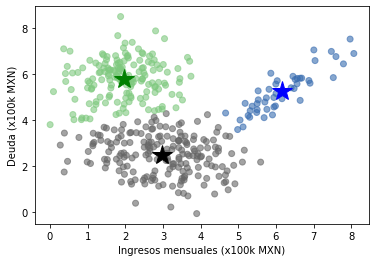

In [17]:
# Gráfico
plt.scatter(data["income"], data["debt"], c=kmeans.labels_, cmap="Accent", alpha=0.6)
plt.plot(kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0, 1], "*g", ms=20)
plt.plot(kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1, 1], "*b", ms=20)
plt.plot(kmeans.cluster_centers_[2, 0], kmeans.cluster_centers_[2, 1], "*k", ms=20)
plt.xlabel("Ingresos mensuales (x100k MXN)")
plt.ylabel("Deuda (x100k MXN)")

Todo se ve bien hasta acá. **¿Qué pasa si aumentamos el número de clusters?**

Una métrica que podemos usar para ver qué tan bueno está siendo el agrupado es la suma de las distancias al cuadrado de cada punto a su centroide respectivo:

$$
\frac{1}{N}\sum_{i=1}^N ||x_i - \mu_{c_i}||^2.
$$

In [20]:
from sklearn.model_selection import train_test_split
import numpy as np

In [21]:
def msd(X, cluster_id, centroids):
    """
    Mean squared distance.
    :param data: Data.
    :param centroids: Centroids.
    :return: Mean squared distance.
    """
    # Number of clusters
    k = centroids.shape[0]
    # Number of points
    N = X.shape[0]
    
    # Distances initialization
    distances = np.zeros(N)
    
    # Compute distances to corresponding cluster
    for j in range(k):
        distances[cluster_id == j] = np.linalg.norm(X[cluster_id == j] - centroids[j, :], axis=1)
        
    return (distances**2).mean()

In [26]:
X_train, X_test = train_test_split(data[["income", "debt"]], test_size=0.2)

msd_train = []
msd_test = []
for k in range(3, 11):
    # Instanciamos el algoritmo
    kmeans = KMeans(n_clusters=k)
    
    # Entrenamos
    kmeans.fit(X=X_train)
    
    # Métrica con datos de entrenamiento
    msd_train.append(msd(X_train, kmeans.labels_, kmeans.cluster_centers_))
    
    # Métrica con datos de prueba
    msd_test.append(msd(X_test, kmeans.predict(X_test), kmeans.cluster_centers_))

Text(0, 0.5, 'Suma de distancias cuadradas')

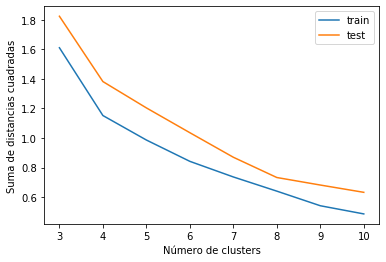

In [27]:
plt.plot(range(3, 11), msd_train, label="train")
plt.plot(range(3, 11), msd_test, label="test")
plt.legend()
plt.xlabel("Número de clusters")
plt.ylabel("Suma de distancias cuadradas")

Text(0, 0.5, 'Deuda (x100k MXN)')

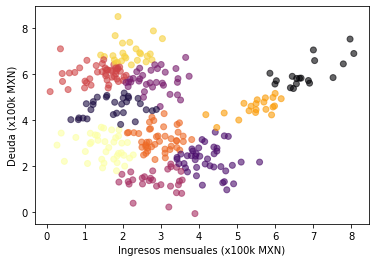

In [28]:
# Gráfico
plt.scatter(X_train["income"], X_train["debt"], c=kmeans.labels_, cmap="inferno", alpha=0.6)
plt.xlabel("Ingresos mensuales (x100k MXN)")
plt.ylabel("Deuda (x100k MXN)")

Como observamos, esta métrica siempre decrece con la cantidad de clusters, lo que hace bastante complejo elegir un número de clusters adecuado cuando este es desconocido.

# 4. Modelo de mezcla Gaussiana (GMM)

Como vimos, el K-Means (y en general los algoritmos de hard clustering) tienen varios detalles:

- No es claro cómo elegir el número de clusters.
- Hay puntos que podrían estar en una frontera entre dos o más clusters, y el hard clustering no nos permite tener incertidumbre en la pertenencia.

Para lidiar con estos problemas, podemos plantear un modelo probablístico de nuestros datos.

Hasta ahora, conocemos algunas distribuciones. Entre ellas la Gaussiana, para la cual ya sabemos como estimar sus parámetros.

¿Qué pasa si intentamos ajustar una **distribución Gaussiana** a los datos? Es decir, si modelamos los datos con

$$
p(x|\theta) = \mathcal{N}(x|\mu, \Sigma), \qquad \theta=\{\mu, \Sigma\}
$$

Text(0, 0.5, 'Deuda (x100k MXN)')

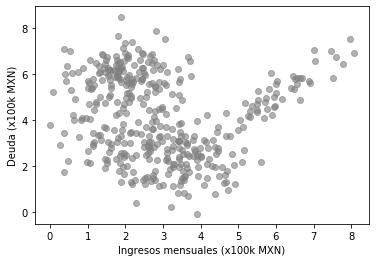

In [29]:
# Datos
plt.scatter(data["income"], data["debt"], c="gray", alpha=0.6)
plt.xlabel("Ingresos mensuales (x100k MXN)")
plt.ylabel("Deuda (x100k MXN)")

In [30]:
from scipy.stats import multivariate_normal
import numpy as np

In [31]:
# Ajustamos parámetros
mu = data[["income", "debt"]].mean()
cov = data[["income", "debt"]].cov()
# Definimos VA
X = multivariate_normal(mean=mu, cov=cov)

Text(0, 0.5, 'Deuda (x100k MXN)')

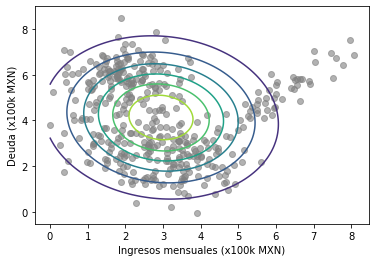

In [32]:
# Datos
plt.scatter(data["income"], data["debt"], c="gray", alpha=0.6)

# Gaussiana
x = np.linspace(0, 8, 100)
y = np.linspace(0, 9, 100)
x, y = np.meshgrid(x, y)
z = X.pdf(np.dstack([x, y]))
plt.contour(x, y, z)
plt.xlabel("Ingresos mensuales (x100k MXN)")
plt.ylabel("Deuda (x100k MXN)")

In [21]:
mu

income    2.913434
debt      4.104847
dtype: float64

Sin embargo, este modelo no parece corresponder con nuestros datos. La región de máxima probabilidad (media) cae en un punto medio entre los clusters, y allí no hay muchos datos.

### ¿Qué pasa si usamos varias Gaussianas?

In [33]:
# Ajustamos parámetros
mu1 = data.loc[data["labels"] == 0, ["income", "debt"]].mean()
mu2 = data.loc[data["labels"] == 1, ["income", "debt"]].mean()
mu3 = data.loc[data["labels"] == 2, ["income", "debt"]].mean()
cov1 = data.loc[data["labels"] == 0, ["income", "debt"]].cov()
cov2 = data.loc[data["labels"] == 1, ["income", "debt"]].cov()
cov3 = data.loc[data["labels"] == 2, ["income", "debt"]].cov()
# Definimos VA
X1 = multivariate_normal(mean=mu1, cov=cov1)
X2 = multivariate_normal(mean=mu2, cov=cov2)
X3 = multivariate_normal(mean=mu3, cov=cov3)

Text(0, 0.5, 'Deuda (x100k MXN)')

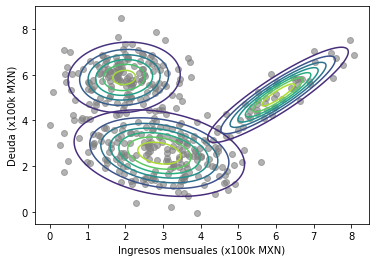

In [34]:
# Datos
plt.scatter(data["income"], data["debt"], c="gray", alpha=0.6)

# Gaussiana 1
x = np.linspace(0, 6, 100)
y = np.linspace(0, 5, 100)
x, y = np.meshgrid(x, y)
z = X1.pdf(np.dstack([x, y]))
plt.contour(x, y, z)

# Gaussiana 2
x = np.linspace(0, 4, 100)
y = np.linspace(4, 9, 100)
x, y = np.meshgrid(x, y)
z = X2.pdf(np.dstack([x, y]))
plt.contour(x, y, z)

# Gaussiana 3
x = np.linspace(3, 8, 100)
y = np.linspace(2, 8, 100)
x, y = np.meshgrid(x, y)
z = X3.pdf(np.dstack([x, y]))
plt.contour(x, y, z)

plt.xlabel("Ingresos mensuales (x100k MXN)")
plt.ylabel("Deuda (x100k MXN)")

**¡Mucho mejor!**

Cada Gaussiana explica un cluster de puntos, y el modelo general sería una suma ponderada de estas densidades Gaussianas:

$$
p(x | \theta) = \sum_{c=1}^{3} \pi_c \mathcal{N}(x | \mu_c, \Sigma_c), \qquad \theta = \{\pi_1, \pi_2, \pi_3, \mu_1, \mu_2, \mu_3, \Sigma_1, \Sigma_2, \Sigma_3\}
$$

**¿Y esto cómo lo interpretamos?**

Bueno, pues si logramos encontrar los parámetros $\pi_1, \pi_2, \pi_3, \mu_1, \mu_2, \mu_3, \Sigma_1, \Sigma_2, \Sigma_3$ para este conjunto de datos, habremos resuelto el problema de (soft) clustering, ya que encontraremos para cada punto la probabilidad de que venga de cada una de las Gaussianas.

**¿Qué ventajas tenemos?**

Como ventaja respecto a usar una sola Gaussiana, hemos añadido flexibilidad a nuestro modelo. Es decir, con esta estuctura podemos representar conjuntos de datos complejos.

> En efecto, podemos aproximar casi cualquier distribución continua con una mezcla de Gaussianas con precisión arbitraria, dado que incluyamos un número suficiente de Gaussianas en la mezcla.

**¿A qué costo?**

La cantidad de parámetros que debemos estimar se multiplica por la cantidad de Gaussianas en la mezcla.

### ¿Cómo encontramos (entrenamos) los parámetros?

Podemos maximizar la función de verosimilitud (suposición de independencia):

$$
\max_{\theta} p(X | \theta) = \prod_{i=1}^N p(x_i | \theta) = \prod_{i=1}^N \sum_{c=1}^{3} \pi_c \mathcal{N}(x_i | \mu_c, \Sigma_c)
$$

sujeto a:

\begin{align}
\sum_{c=1}^3 \pi_c & = 1 \\
\pi_c & \geq 0 \quad \text{for } c=1,2,3\\
\Sigma_c & \succ 0 \quad \text{for } c=1,2,3
\end{align}

Es decir, las matrices de covarianza deben ser definidas positivas (¿por qué?).

**Complejidades numéricas:**

Este problema de optimización puede ser resuelto numéricamente con un algoritmo como el gradiente descendiente. Sin embargo,

1. La restricción sobre la matriz de covarianzas hace el problema de optimización muy complejo de resolver numéricamente hablando.

   Una simplificación para poder trabajar con esta restricción es suponer que las matrices de covarianza son diagonales:

$$
\Sigma_c = \text{diag}(\sigma_{c1}, \sigma_{c2}, \dots, \sigma_{cn}),
$$

2. La suma dentro del producto también hace bastante complejo el cálculo de los gradientes. Comúnmente, para evitar el producto se toma logaritmo de la verosimilitud:

   $$
   \log p(X | \theta) = \log \left(\prod_{i=1}^N p(x_i | \theta) \right)= \sum_{i=1}^N \log\left(\sum_{c=1}^{3} \pi_c \mathcal{N}(x_i | \mu_c, \Sigma_c)\right)
   $$

   y con esto, podemos observar que permanece una suma ponderada dentro del logaritmo.

### ¿Y entonces?

Afortunadamente, existe un algoritmo alternativo con base probabilística llamado **algoritmo de maximización de la esperanza**, el cual estaremos estudiando en las próximas clases no solo para el problema de mezclas Gaussianas, sino para entrenar cualquier modelo con **variables latentes**.

**¿Variables latentes?**

Recordamos que propusimos el siguiente modelo:

$$
p(x | \theta) = \sum_{c=1}^{3} \pi_c \mathcal{N}(x | \mu_c, \Sigma_c), \qquad \theta = \{\pi_1, \pi_2, \pi_3, \mu_1, \mu_2, \mu_3, \Sigma_1, \Sigma_2, \Sigma_3\}
$$

Este modelo en realidad, lo podemos pensar como un modelo con una variable latente $t$ que determina a cuál Gaussiana pertenece cada punto:

![gmm](figures/gmm.png)

Entonces, razonablemente podemos atribuirle a $t$ tres posibles valores (1, 2, y 3), que nos dicen de qué Gaussiana viene el punto. Recordamos que $t$ es una variable latente, nunca la observamos.

Sin embargo, razonando probabilísticamente, después de entrenar nuestra mezcla Gaussiana, podríamos preguntarle al modelo, ¿Cuál es el valor más probable de $t$ dado el punto $x$? --> **Clustering**

Con este modelo, podemos asignar las siguientes probabilidades:

- Previa:
  
  $$
  p(t=c | \theta) = \pi_c
  $$
  
- Verosimilitud:
  
  $$
  p(x | t=c, \theta) = \mathcal{N}(x | \mu_c, \Sigma_c)
  $$
 
Razonable, ¿no?

Y con lo anterior,

$$
p(x | \theta) = \sum_{c=1}^3 p(x, t=c | \theta) = \sum_{c=1}^3 \underbrace{p(x | t=c, \theta)}_{\mathcal{N}(x | \mu_c, \Sigma_c)} \underbrace{p(t=c | \theta)}_{\pi_c},
$$

justo como el modelo intuitivo que habíamos propuesto.

### Algoritmo de maximización de la esperanza para mezclas Gaussianas - Intuición

Supongamos que tenemos los siguientes puntos de tamaños de playeras, y queremos definir cuáles son talla chica y cuales son talla grande:

In [35]:
from shirts_size_data import generate_shirts_data
from scipy.stats.distributions import norm

In [36]:
shirts_data = generate_shirts_data()
shirts_data.head()

,size,labels
0,31.554606,0.0
1,31.222931,0.0
2,30.678384,0.0
3,42.104057,1.0
4,40.355446,1.0


Text(0.5, 0, 'Tamaño (cm)')

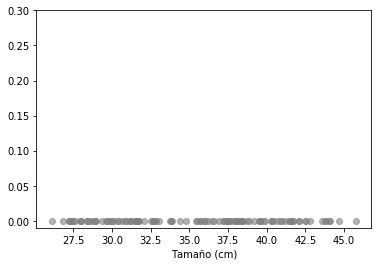

In [37]:
plt.scatter(shirts_data["size"], np.zeros(len(shirts_data)), c="gray", alpha=0.6)
plt.ylim([-0.01, 0.3])
plt.xlabel("Tamaño (cm)")

¿Cómo estimamos los parámetros de nuestro modelo de variable latente?

Analicemos varios casos:

1. Si de entrada supiéramos cuáles playeras son chicas y cuáles grandes:

Text(0.5, 0, 'Tamaño (cm)')

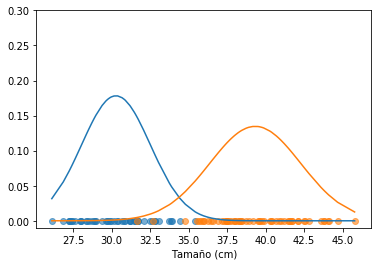

In [38]:
plt.scatter(shirts_data.loc[shirts_data["labels"] == 0, "size"],
            np.zeros((shirts_data["labels"] == 0).sum()),
            alpha=0.6)
plt.scatter(shirts_data.loc[shirts_data["labels"] == 1, "size"],
            np.zeros((shirts_data["labels"] == 1).sum()),
            alpha=0.6)
x = shirts_data["size"].copy().values
x.sort()
mu1 = shirts_data.loc[shirts_data["labels"] == 0, "size"].mean()
mu2 = shirts_data.loc[shirts_data["labels"] == 1, "size"].mean()
s1 = shirts_data.loc[shirts_data["labels"] == 0, "size"].std()
s2 = shirts_data.loc[shirts_data["labels"] == 1, "size"].std()
plt.plot(x, norm.pdf(x, loc=mu1, scale=s1))
plt.plot(x, norm.pdf(x, loc=mu2, scale=s2))
plt.ylim([-0.01, 0.3])
plt.xlabel("Tamaño (cm)")

$$
p(x | t=1, \theta) = \mathcal{N}(x | \mu_1, \sigma_1)
$$

Con lo cual:

$$
\mu_1 = \frac{\sum_{i: t_i = 1} x_i}{\sum_{i: t_i = 1} 1}, \qquad \sigma_1^2 = \frac{\sum_{i: t_i = 1} (x_i - \mu_1)^2}{\sum_{i: t_i = 1} 1},
$$

y

$$
\mu_2 = \frac{\sum_{i: t_i = 2} x_i}{\sum_{i: t_i = 2} 1}, \qquad \sigma_2^2 = \frac{\sum_{i: t_i = 2} (x_i - \mu_1)^2}{\sum_{i: t_2 = 1} 1}
$$

2. Como sablemos, en el algoritmo de mezclas Gaussianas nunca sabremos si un punto pertenece a cierto cluster o no, sino que conoceremos las probabilidades de que pertenezca a cada cluster.

   De modo que si conocemos la posterior $p(t | x, \theta)$, entonces ponderamos lo anterior por esta probabilidad:
   
   $$
\mu_1 = \frac{\sum_{i} p(t_i=1 | x_i, \theta)x_i}{\sum_{i} p(t_i=1 | x_i, \theta)}, \qquad \sigma_1^2 = \frac{\sum_{i} p(t_i=1 | x_i, \theta) (x_i - \mu_1)^2}{\sum_{i} p(t_i=1 | x_i, \theta)}.
   $$

3. ¿Y cómo conocemos la posterior $p(t | x, \theta)$?

   Bueno, pues si conocemos los parámetros, es bastante fácil:
   
   $$
   p(t=c | x, \theta) = \frac{p(x | t=c, \theta) p(t=c | \theta)}{Z} = \frac{\pi_c \mathcal{N}(x | \mu_c, \sigma_c)}{Z}.
   $$

Tenemos un razonamiento circular (un problema del tipo, ¿Qué fue primero?, ¿El huevo?, ¿O la gallina?). 

**¿Cómo lo resolvemos? Iterando...**

**Algoritmo de maximización de la esperanza:**

1. Inicializamos los parámetros de cada Gaussiana aleatoriamente.

2. Repetir hasta la convergencia:
   
   - Calcular para cada punto la probabilidad posterior $p(t_i=c | x_i, \theta)$.
   - Actualizar los parámetros de las Gaussianas con las probabildades calculadas.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>